### Trends

- To visualize a trend, we take on average over a period longer that any seasonal period in the series.
- Out of sample feature refers to time outside of the ovservation period of the trianing data

Keywords : Moving Average

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

%config InlineBackend.figure_format = 'retina'


In [ ]:
data_dir = Path("/content/drive/MyDrive/Colab Notebooks/Time Series Upskilling/Times series kaggle/data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates = ["Day"])
tunnel = tunnel.set_index("Day").to_period()
display(tunnel.head())

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


<Axes: title={'center': 'Tunnel Traffic - 365 day moving average'}, xlabel='Day'>

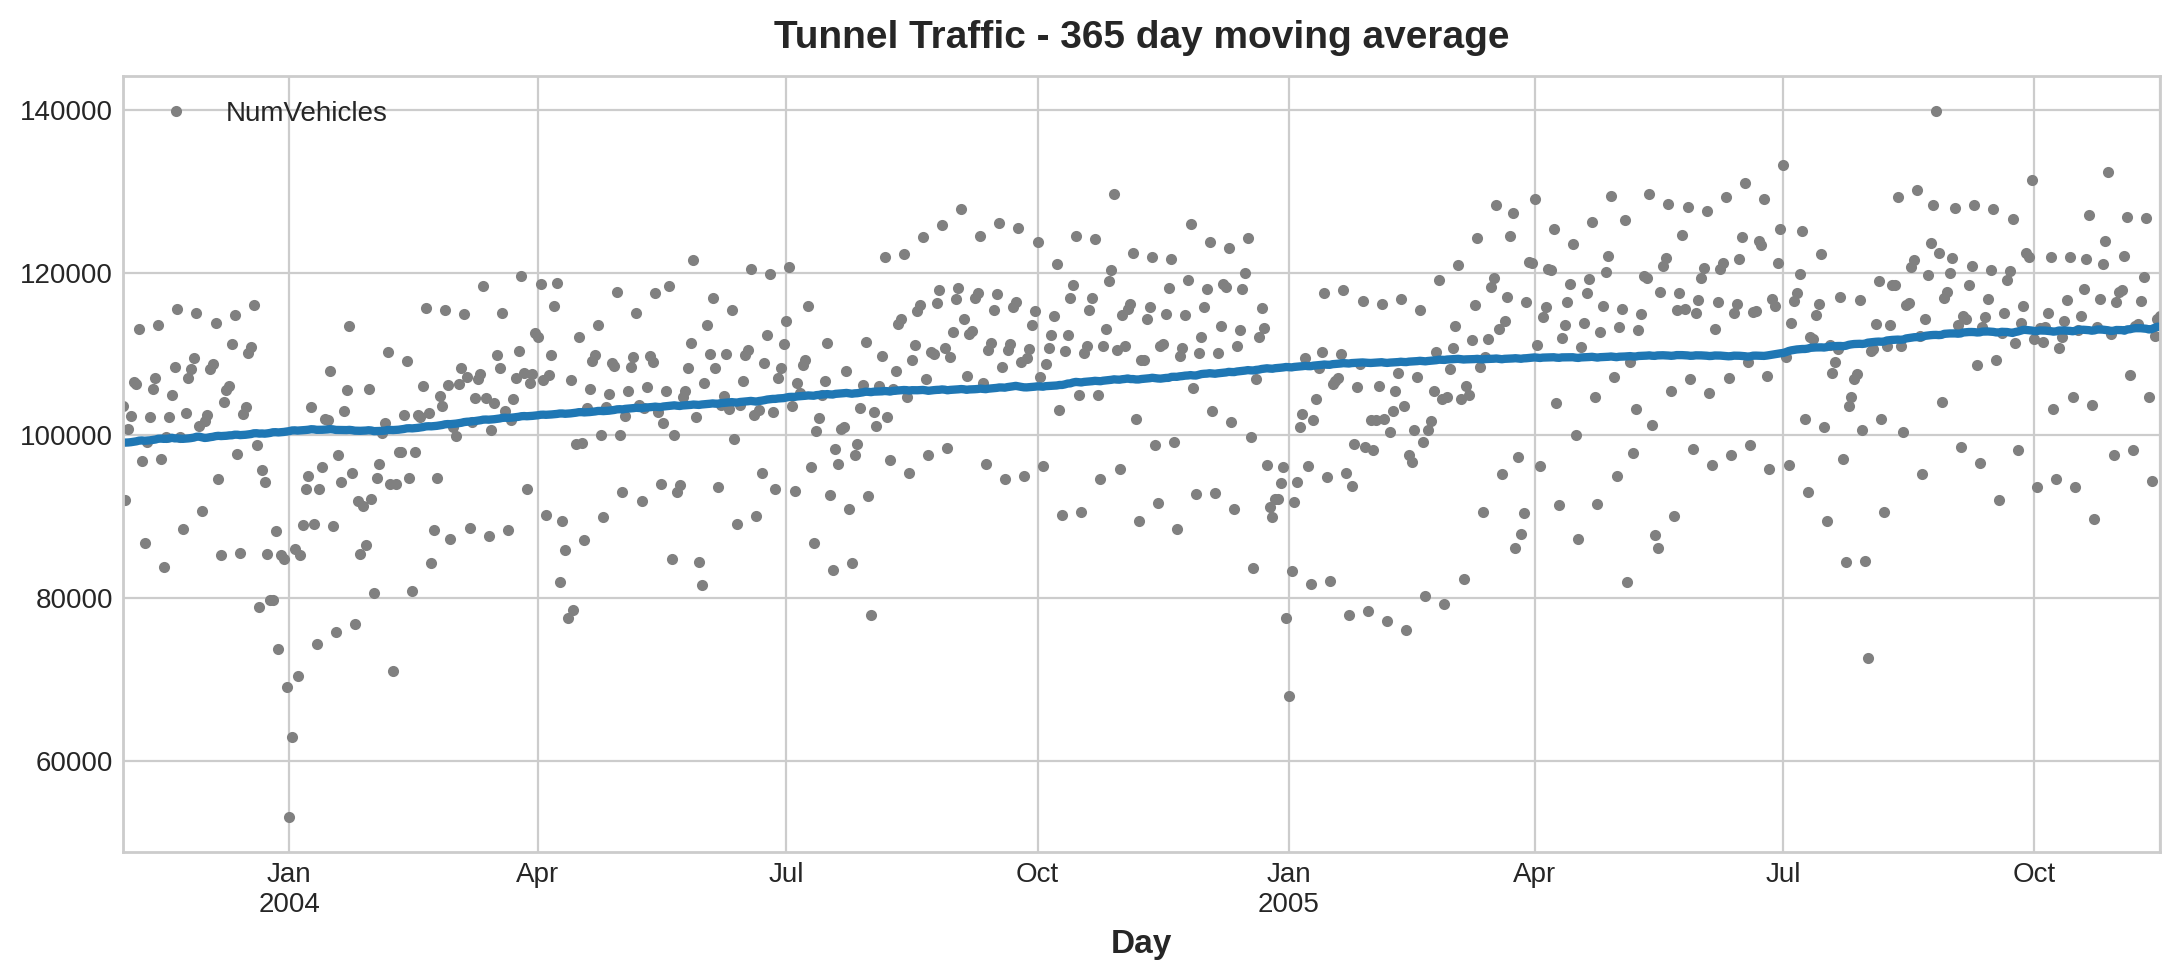

In [ ]:
moving_average = tunnel.rolling(
    window = 365, # 365 day window
    center = True, # puts the average at the center of the window
    min_periods = 183,
).mean()

ax = tunnel.plot(style=".", color="0.5")

moving_average.plot(ax = ax, linewidth=3, title="Tunnel Traffic - 365 day moving average", legend=False)

In [ ]:
len(tunnel), len(moving_average)

(747, 747)

### Time-step features - time-dummy

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index = tunnel.index,  # dates from the training data
    constant = True,  # dummy feaure for the bias
    order = 1, # the time dummy
    drop = True # drop terms if necessary to avoid collinearity
)
# `in_sample` creates features for the dates given in the `index` (tunnel.index) argument
X = dp.in_sample()
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [ ]:
len(X), len(tunnel)

(747, 747)

In [ ]:
tunnel[tunnel.index == "2005-11-17"]

,NumVehicles
Day,


In [ ]:
X[X.index == "2005-11-17"]

,const,trend
Day,,


In [ ]:
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [ ]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]

model = LinearRegression(fit_intercept = False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred = pd.Series(model.predict(X), index=X.index)

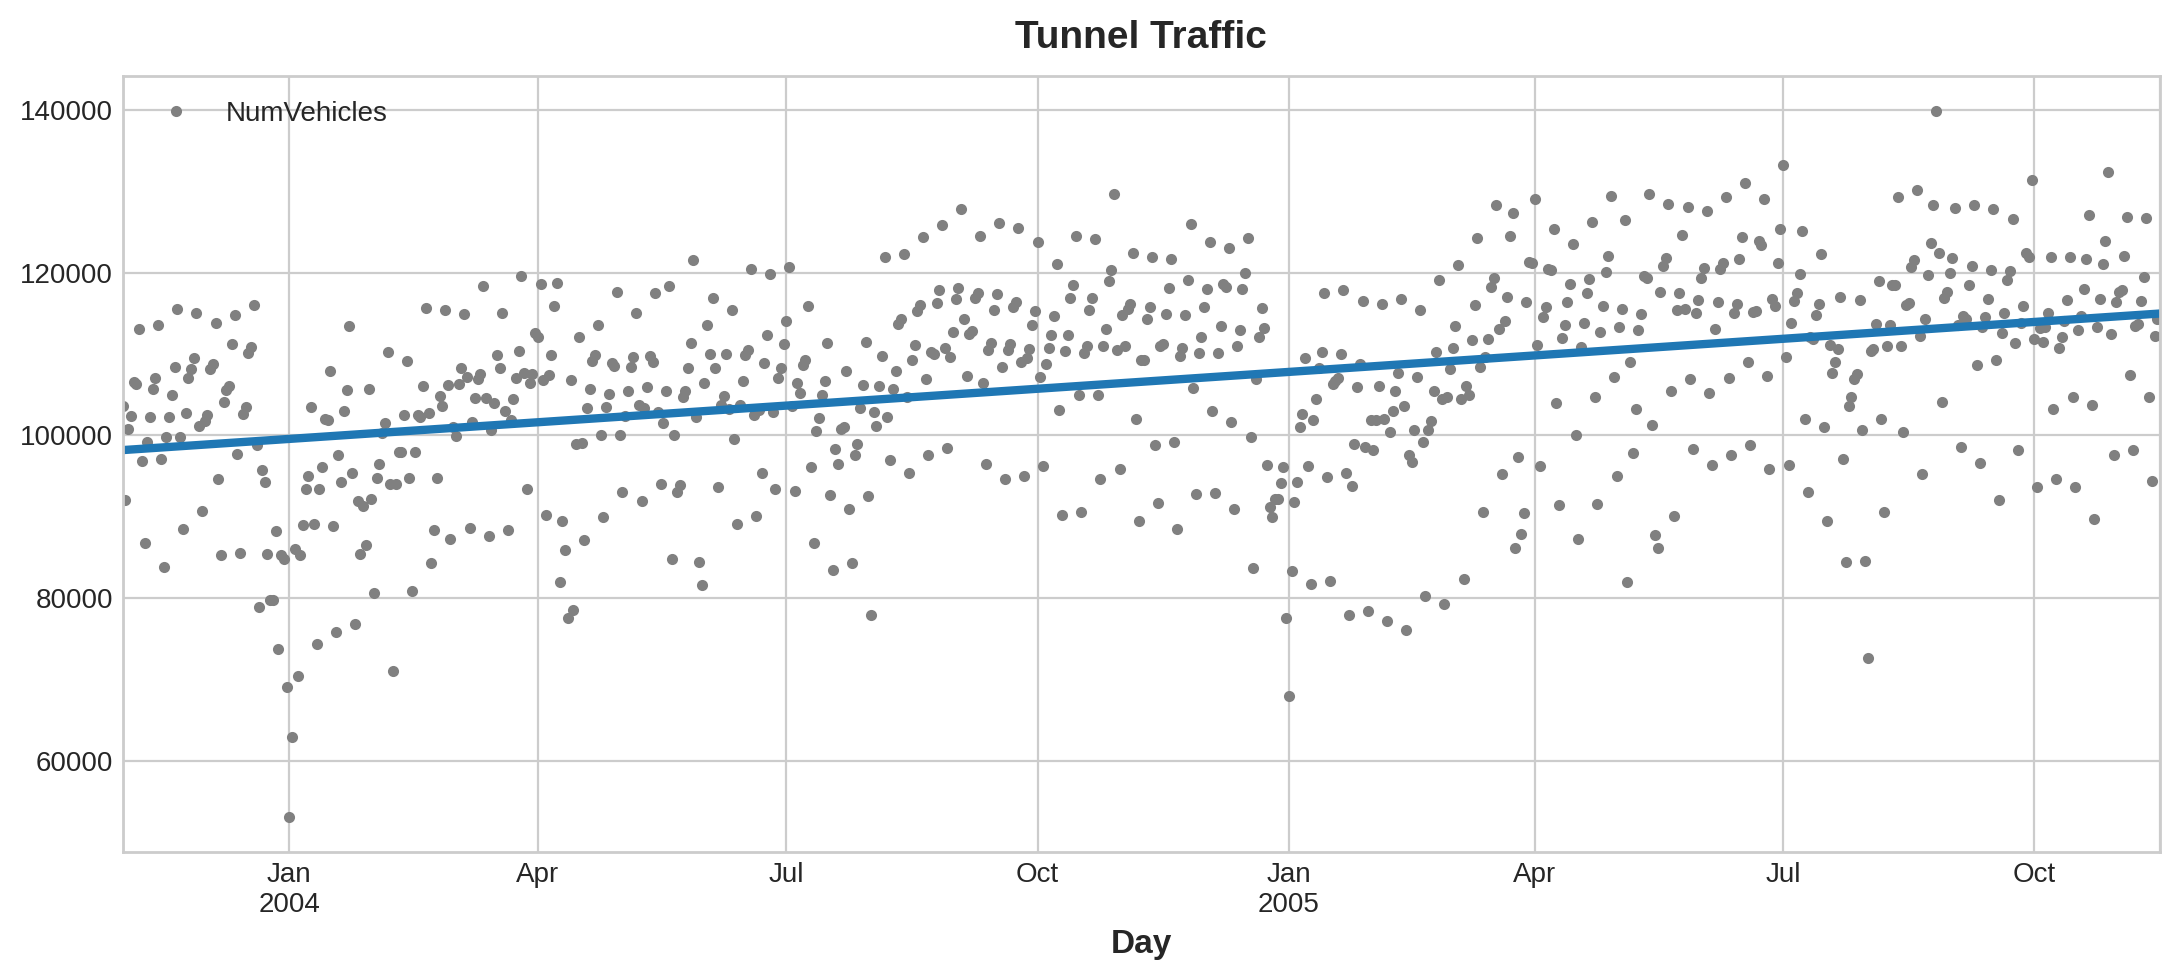

In [ ]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=30)
display(X.head())
y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

,const,trend
2005-11-17,1.0,748.0
2005-11-18,1.0,749.0
2005-11-19,1.0,750.0
2005-11-20,1.0,751.0
2005-11-21,1.0,752.0


2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

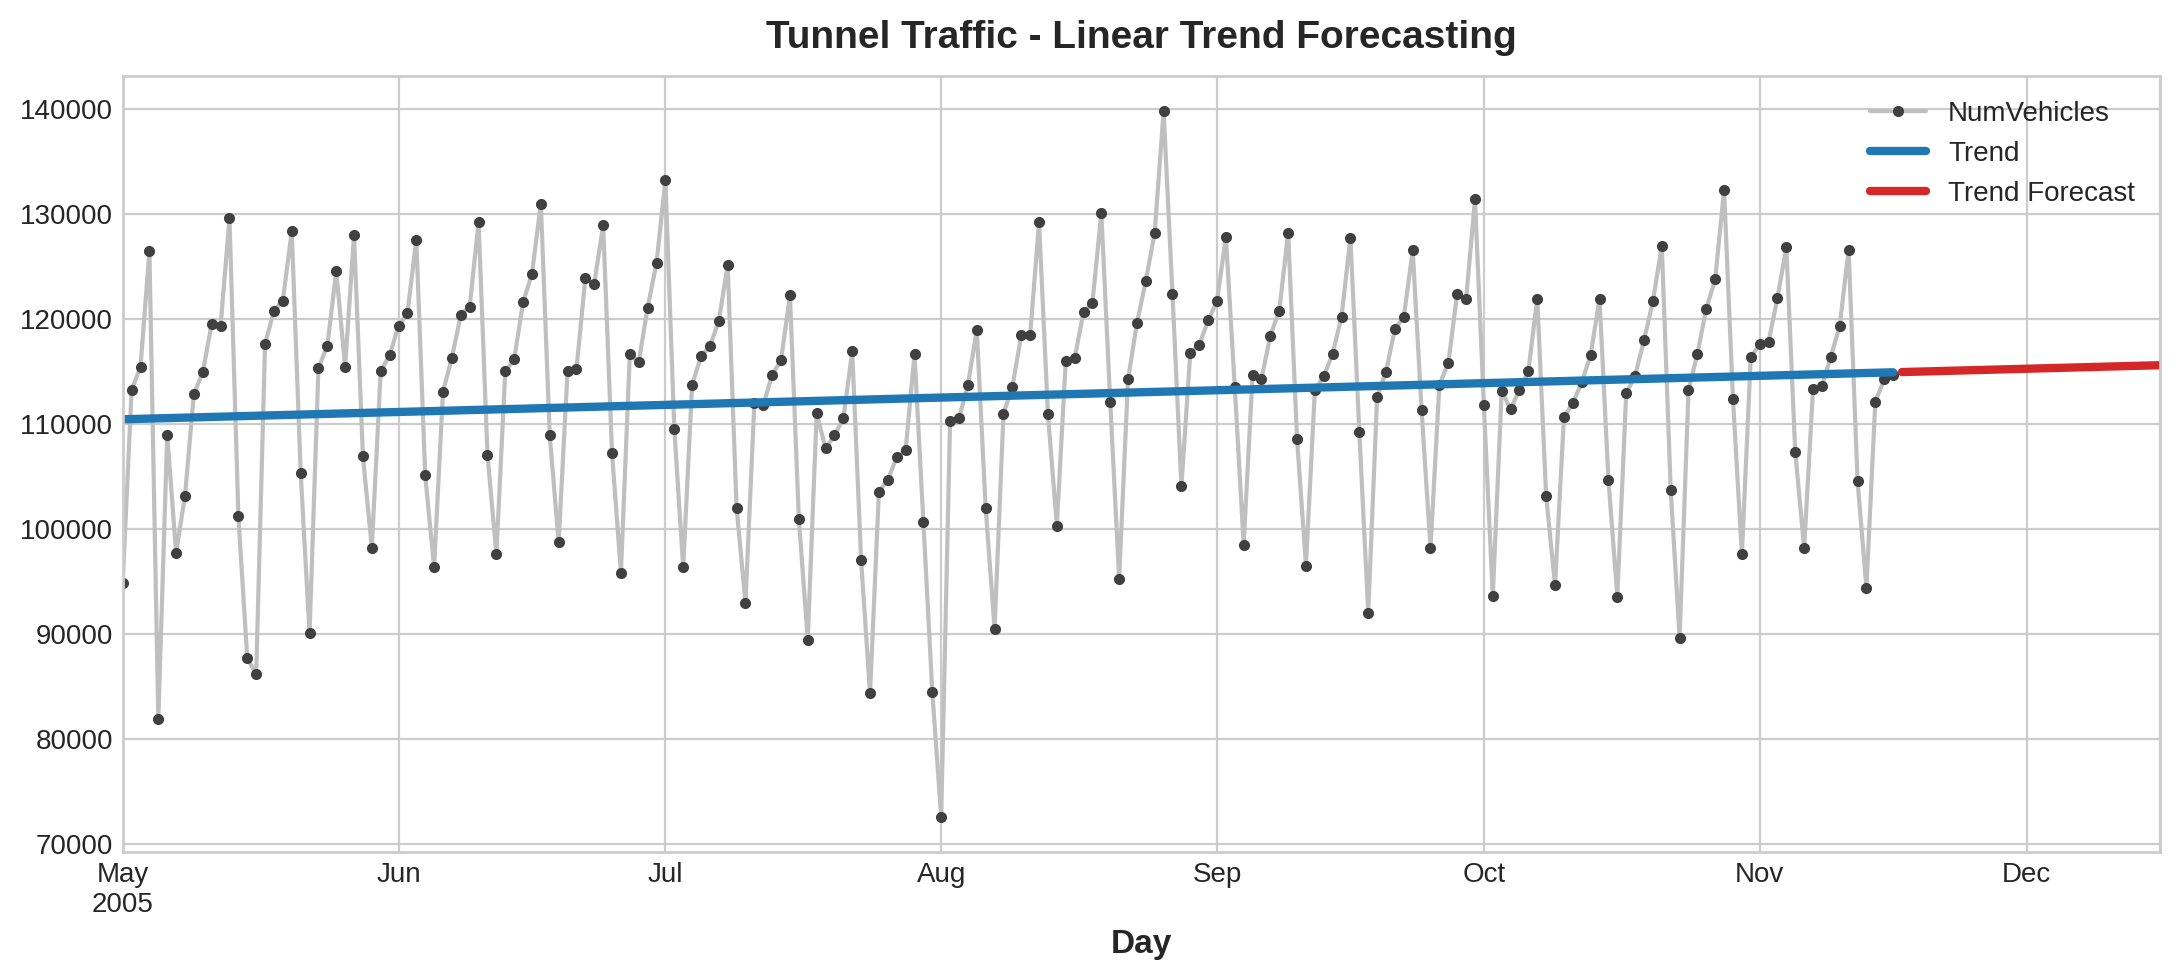

In [ ]:
ax = tunnel["2005-05":].plot(title = "Tunnel Traffic - Linear Trend Forecasting", **plot_params)
ax = y_pred["2005-05":].plot(ax = ax, linewidth = 3, label = "Trend")

ax = y_fore.plot(ax = ax, linewidth = 3, label = "Trend Forecast", color="C3")
_ = ax.legend()

In [ ]:
y_pred["2005-05":]

Day
2005-05-01    110482.311239
2005-05-02    110504.808688
2005-05-03    110527.306138
2005-05-04    110549.803588
2005-05-05    110572.301037
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Freq: D, Length: 200, dtype: float64